# LearnX Sales Forecasting
____________________________________

## Table of Contents
1. Problem Statement
2. Importing Packages
3. Loading Data
4. Praparing the data
5. Exploratory Data Analysis
    - 5.1. proportion of course domains
    - 5.2. Couse Types
    - 5.3. Heat map
    - 5.4. proportion of Short Promotions
    - 5.5. proportion of Long Promotions
6. Machine learning algorithm:
    - Linar Regression
        - Using the Model for Prediction
        - Model evaluation
    - RandomForest
        - Using the Model for Prediction
        - Model evaluation
    - K-Nearest Neighbour
        - Using the Model for Prediction
        - Model evaluation
7. Analysing the algorithms



### 1. Problem Statement

LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on.

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.


### 2. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

### 3. Loading Data

In [2]:
train = pd.read_csv("C:/Users/Lopamudra Mandal/Downloads/New folder (4)/train.csv")

In [3]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
ID                    512087 non-null int64
Day_No                512087 non-null int64
Course_ID             512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    510323 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


### 4. Preparing the data

In [5]:
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [6]:
train=train.drop(['Competition_Metric','ID','Day_No'], axis=1)

In [7]:
train.shape

(512087, 8)

In [8]:
train.isnull().sum()

Course_ID          0
Course_Domain      0
Course_Type        0
Short_Promotion    0
Public_Holiday     0
Long_Promotion     0
User_Traffic       0
Sales              0
dtype: int64

In [9]:
train.describe()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,300.388344,0.380244,0.031639,0.488968,15375.101198,120.826924
std,173.365787,0.485447,0.175038,0.499879,7727.231205,54.355258
min,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000
25%,150.000000,0.000000,0.000000,0.000000,10584.000000,84.000000
50%,300.000000,0.000000,0.000000,0.000000,13776.000000,111.000000
75%,451.000000,1.000000,0.000000,1.000000,18123.000000,146.000000
max,600.000000,1.000000,1.000000,1.000000,100002.000000,682.000000


### 5. Exploratory Data Analysis

#### 5.1. proportion of course domains

Text(0, 0.5, 'Course Domain')

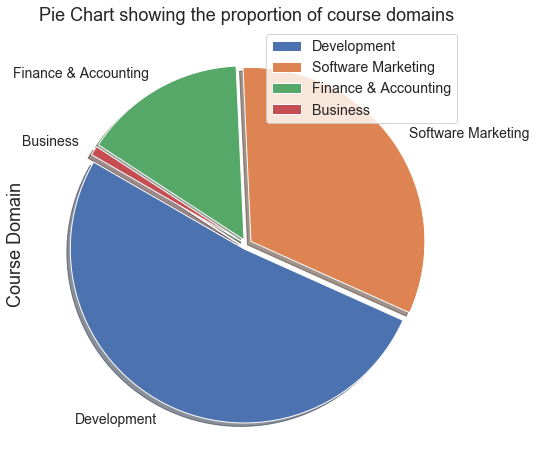

In [10]:
train.Course_Domain.value_counts().plot(kind='pie', fontsize=14, shadow=True, explode=[0.03,0.03,0.03,0.03],
                                    startangle=150, figsize=(8,8), legend=True)
plt.title('Pie Chart showing the proportion of course domains', fontsize=18)
plt.ylabel('Course Domain', fontsize=18)

#### 5.2. Couse Types

Text(0.5, 1.0, 'Course Type')

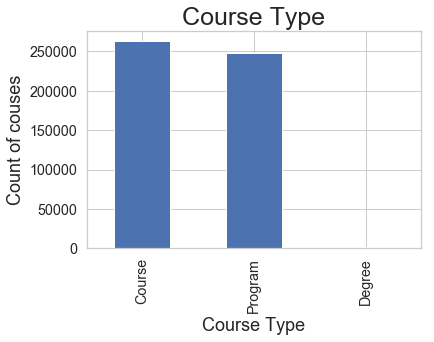

In [11]:
train.Course_Type.value_counts().plot(kind="bar")
plt.xlabel('Course Type', fontsize=18)
plt.ylabel('Count of couses', fontsize=18)
plt.title('Course Type',fontsize=25)

#### 5.3. Heat map

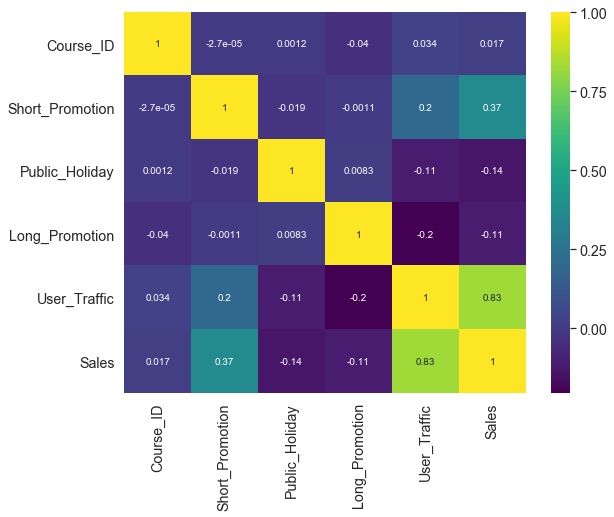

In [12]:
corr_mat = train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

#### 5.4. proportion of Short Promotions

Text(0, 0.5, 'Short Promotion')

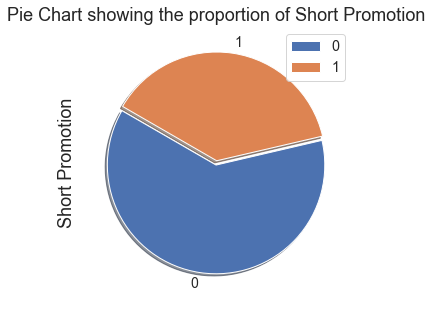

In [13]:
train.Short_Promotion.value_counts().plot(kind='pie', fontsize=14, shadow=True, explode=[0.02,0.02],
                                    startangle=150, figsize=(5,5), legend=True)
plt.title('Pie Chart showing the proportion of Short Promotion', fontsize=18)
plt.ylabel('Short Promotion', fontsize=18)

#### 5.5. proportion of Long Promotions

Text(0, 0.5, 'Long Promotion')

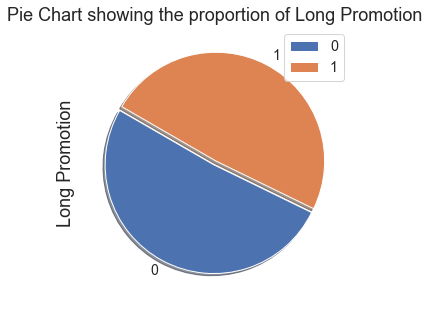

In [14]:
train.Long_Promotion.value_counts().plot(kind='pie', fontsize=14, shadow=True, explode=[0.02,0.02],
                                    startangle=150, figsize=(5,5), legend=True)
plt.title('Pie Chart showing the proportion of Long Promotion', fontsize=18)
plt.ylabel('Long Promotion', fontsize=18)

#### 5.5. proportion of Public Holidays

Text(0, 0.5, 'Public Holiday')

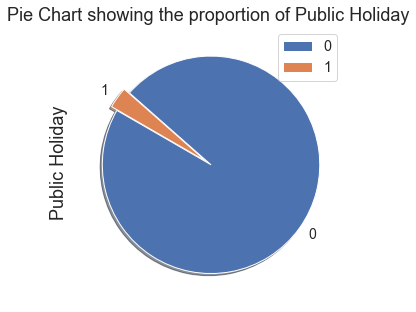

In [15]:
train.Public_Holiday.value_counts().plot(kind='pie', fontsize=14, shadow=True, explode=[0.03,0.03],
                                    startangle=150, figsize=(5,5), legend=True)
plt.title('Pie Chart showing the proportion of Public Holiday', fontsize=18)
plt.ylabel('Public Holiday', fontsize=18)

### Machine learning algorithms

#### 6.1 Linear Regression

#### Creating dummies for Course_Domain & Course_Type

In [16]:
train1 = pd.get_dummies(train, columns=['Course_Domain','Course_Type'], drop_first=True)

In [17]:
train1.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,0,1,1,11004,81,1,0,0,0,0
1,1,0,0,1,13650,79,1,0,0,0,0
2,1,0,0,1,11655,75,1,0,0,0,0
3,1,0,0,1,12054,80,1,0,0,0,0
4,1,0,0,1,6804,41,1,0,0,0,0


In [18]:
train1.columns

Index(['Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'User_Traffic', 'Sales', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

#### Scaling data

In [19]:
scaler = StandardScaler().fit(train1)
train2 = scaler.transform(train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
train3 = pd.DataFrame(train2)
train3.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.726919,-0.783287,5.532306,1.022313,-0.565676,-0.732716,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
1,-1.726919,-0.783287,-0.180756,1.022313,-0.223250,-0.769511,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
2,-1.726919,-0.783287,-0.180756,1.022313,-0.481428,-0.843101,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
3,-1.726919,-0.783287,-0.180756,1.022313,-0.429792,-0.751113,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
4,-1.726919,-0.783287,-0.180756,1.022313,-1.109208,-1.468616,0.968276,-0.42136,-0.693097,-0.058793,-0.967459


In [21]:
train3.columns = ['Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'User_Traffic', 'Sales', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program']
train3.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,-1.726919,-0.783287,5.532306,1.022313,-0.565676,-0.732716,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
1,-1.726919,-0.783287,-0.180756,1.022313,-0.223250,-0.769511,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
2,-1.726919,-0.783287,-0.180756,1.022313,-0.481428,-0.843101,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
3,-1.726919,-0.783287,-0.180756,1.022313,-0.429792,-0.751113,0.968276,-0.42136,-0.693097,-0.058793,-0.967459
4,-1.726919,-0.783287,-0.180756,1.022313,-1.109208,-1.468616,0.968276,-0.42136,-0.693097,-0.058793,-0.967459


#### Preparing X and Y

In [22]:
X = train3.loc[:,train.columns != 'Sales']

In [23]:
Y=train3[['Sales']]

In [24]:
X.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales,Course_Domain_Development
0,-1.726919,-0.783287,5.532306,1.022313,-0.565676,-0.732716,0.968276
1,-1.726919,-0.783287,-0.180756,1.022313,-0.223250,-0.769511,0.968276
2,-1.726919,-0.783287,-0.180756,1.022313,-0.481428,-0.843101,0.968276
3,-1.726919,-0.783287,-0.180756,1.022313,-0.429792,-0.751113,0.968276
4,-1.726919,-0.783287,-0.180756,1.022313,-1.109208,-1.468616,0.968276


In [25]:
Y.head()

,Sales
0,-0.732716
1,-0.769511
2,-0.843101
3,-0.751113
4,-1.468616


#### Splitting X and y into training and test datasets

In [26]:
from sklearn.model_selection import train_test_split

def split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=1)

In [27]:
X_train, X_test, Y_train, Y_test = split(X,Y)

In [28]:
X_train.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Sales,Course_Domain_Development
462829,1.399422,1.276672,-0.180756,-0.978174,0.358330,0.683892,-1.032763
31290,-1.519265,-0.783287,-0.180756,1.022313,0.249624,0.978252,-1.032763
16637,-1.617324,-0.783287,-0.180756,1.022313,-0.383592,-0.180791,-1.032763
104813,-1.017436,1.276672,-0.180756,-0.978174,-0.715147,-1.100666,-1.032763
428308,1.168696,-0.783287,-0.180756,-0.978174,-0.329239,-0.787908,0.968276


#### 6.1 Linear regression model

In [29]:
linreg = LinearRegression()

In [30]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Using the Model for Prediction

In [31]:
Y_pred_train = linreg.predict(X_train)
Y_pred_test = linreg.predict(X_test)    

#### Model evaluation

In [32]:
MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)

In [33]:
MSE_train = metrics.mean_squared_error(Y_train, Y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)

In [34]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))

In [35]:
RMSE_train

5.8639762527130435e-15

In [36]:
RMSE_test

5.8462448582986424e-15

#### 6.2. Random Forest

In [48]:
regressor_RandomForest = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [49]:
regressor_RandomForest.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Using the Model for Prediction

In [50]:
Y_pred_train_RandomForest = regressor_RandomForest.predict(X_train)
Y_pred_test_RandomForest = regressor_RandomForest.predict(X_test)  

#### Model evaluation

In [51]:
MAE_train_RandomForest = metrics.mean_absolute_error(Y_train, Y_pred_train_RandomForest)
MAE_test_RandomForest = metrics.mean_absolute_error(Y_test, Y_pred_test_RandomForest)

In [52]:
MSE_train_RandomForest = metrics.mean_squared_error(Y_train, Y_pred_train_RandomForest)
MSE_test_RandomForest = metrics.mean_squared_error(Y_test, Y_pred_test_RandomForest)

In [54]:
RMSE_train_RandomForest = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_RandomForest))
RMSE_test_RandomForest = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test_RandomForest))

In [55]:
RMSE_train_RandomForest

0.0006078251172610812

In [56]:
RMSE_test_RandomForest

0.003677097083891608

#### 6.3 K-Nearest Neighbour

In [38]:
regressor = KNeighborsRegressor(n_neighbors=3)

In [39]:
regressor.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

#### Using the Model for Prediction

In [41]:
Y_pred_train_knn = regressor.predict(X_train)
Y_pred_test_knn = regressor.predict(X_test)  

#### Model evaluation

In [42]:
MAE_train_knn = metrics.mean_absolute_error(Y_train, Y_pred_train_knn)
MAE_test_knn = metrics.mean_absolute_error(Y_test, Y_pred_test_knn)

In [43]:
MSE_train_knn = metrics.mean_squared_error(Y_train, Y_pred_train_knn)
MSE_test_knn = metrics.mean_squared_error(Y_test, Y_pred_test_knn)

In [44]:
RMSE_train_knn = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train_knn))
RMSE_test_knn = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test_knn))

In [45]:
RMSE_train_knn

0.017087147848942472

In [46]:
RMSE_test_knn

0.026566911436078214

### 7. Analysing the algorithms

In [73]:
data = {'RMSE_train': pd.Series([RMSE_train,RMSE_train_RandomForest,RMSE_train_knn],
        index = ['RMSE_LinearRegression','RMSE_RandomForest','RMSE_knn']),
       'RMSE_test': pd.Series([RMSE_test,RMSE_test_RandomForest,RMSE_test_knn],
        index = ['RMSE_LinearRegression','RMSE_RandomForest','RMSE_knn'])}

In [76]:
Analysis = pd.DataFrame(data)

In [74]:
print(data)

{'RMSE_train': RMSE_LinearRegression    5.863976e-15
RMSE_RandomForest        6.078251e-04
RMSE_knn                 1.708715e-02
dtype: float64, 'RMSE_test': RMSE_LinearRegression    5.846245e-15
RMSE_RandomForest        3.677097e-03
RMSE_knn                 2.656691e-02
dtype: float64}


In [77]:
Analysis

,RMSE_train,RMSE_test
RMSE_LinearRegression,5.863976e-15,5.846245e-15
RMSE_RandomForest,6.078251e-04,3.677097e-03
RMSE_knn,1.708715e-02,2.656691e-02
